# 🌳 Woche 3: Bäume, Nachbarn und Clustering – AMALEA Kernkonzepte

> 🚀 **Motivation:**
 >
> In dieser Woche tauchst du in die drei wichtigsten Algorithmen des Machine Learning ein – verständlich, praxisnah und direkt anwendbar für dein Portfolio!

> 💡 **Warum lohnt sich das?**
- Wer Decision Trees, KNN und K-Means versteht, kann 80% aller ML-Projekte meistern.
- Du kannst eigene ML-Apps bauen und erklären – ein echter Pluspunkt für Bewerbungen.
- Du sammelst praktische Erfahrung mit Tools, die in der Data-Science-Praxis Standard sind.

> 📚 **Glossar-Tipp:** Unklare Begriffe? Schau ins [Glossar](../../01_Python_Grundlagen/02_Glossar_Alle_Begriffe_erklärt.ipynb) – dort findest du alle wichtigen Erklärungen!

**Was erwartet dich in dieser Datei?**
- Integration der ursprünglichen AMALEA-Notebooks:
  - "Willkommen in der Baumschule!" → Decision Trees
  - "Schöne Nachbarschaft" → K-Nearest Neighbors
  - "K-Means-Clustering" → Unsupervised Learning
- Theoretische Grundlagen und praktische Umsetzung
- Streamlit-Apps und Visualisierungen für alle drei Algorithmen
- Portfolio-Tipps und weiterführende Lernpfade

## 📚 Was du heute lernst

- **Decision Trees** 🌳 – Wie Computer Entscheidungen treffen
- **K-Nearest Neighbors (KNN)** 👥 – Lernen von den Nachbarn
- **K-Means Clustering** 🎯 – Gruppen in Daten finden
- **Supervised vs. Unsupervised Learning** unterscheiden
- **Streamlit-Apps** für alle drei Algorithmen erstellen

---

## 🎬 Ergänzende Videos: Advanced Algorithms

**📼 Original AMALEA Video-Serie (KIT 2021):**

- **Video 1:** `../Kurs-Videos/amalea-kit2021-w3v2 (1080p).mp4` – Willkommen in der Baumschule! (Decision Trees)
- **Video 2:** `../Kurs-Videos/amalea-kit2021-w3v3 (1080p).mp4` – Schöne Nachbarschaft (K-Nearest Neighbors)
- **Video 3:** `../Kurs-Videos/amalea-kit2021-w3v4 (1080p).mp4` – K-Means Clustering

💡 **Tipp:** Diese drei Algorithmen sind die "Big 3" des Machine Learning – wenn du sie verstehst, bist du für 80% aller ML-Projekte gerüstet!

---

## 🎯 Kernkonzepte aus dem ursprünglichen AMALEA-Kurs

### Decision Trees 🌳
> **Idee:** Wie Menschen Entscheidungen treffen – durch eine Serie von Ja/Nein-Fragen

**Beispiel aus dem ursprünglichen Kurs:**
```
Ist es sonnig?
├─ JA → Gehe spazieren
└─ NEIN → Ist es regnerisch?
    ├─ JA → Bleibe zu Hause
    └─ NEIN → Gehe joggen
```

**Vorteile:**
- ✅ Leicht interpretierbar
- ✅ Keine Daten-Normalisierung nötig
- ✅ Arbeitet mit kategorialen und numerischen Daten

**Nachteile:**
- ❌ Kann zu Overfitting neigen
- ❌ Instabil bei kleinen Datenänderungen

### K-Nearest Neighbors (KNN) 👥
> **Idee:** "Sage mir, wer deine Nachbarn sind, und ich sage dir, wer du bist."

**Funktionsweise:**
1. Finde die k nächsten Nachbarn
2. Schaue, welche Klasse am häufigsten ist
3. Treffe Vorhersage basierend auf Mehrheit

**Parameter k:**
- k=1: Sehr flexibel, aber anfällig für Ausreißer
- k=groß: Glatter, aber weniger Details
- k=ungerade: Vermeidet Unentschieden

### K-Means Clustering 🎯
> **Idee:** Finde natürliche Gruppen in den Daten (ohne Labels!)

**Unterschied zu Supervised Learning:**
- **Supervised** (Decision Trees, KNN): Haben Labels/Targets
- **Unsupervised** (K-Means): Keine Labels, finde Muster selbst

## 🧭 So nutzt du dieses Notebook
1) Umgebung: `pip install -r requirements.txt` (oder Repo-Root `pip install -r requirements.txt`).
2) Repro: Seeds setzen, Versionen loggen (nächste Zelle).
3) Läufe schlank halten: Kleine Grids, kleine Samples für Demos.


In [1]:
# 📦 Imports (Pakete bitte vorher mit requirements installieren)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_wine, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score, adjusted_rand_score

# Kleine Hyperparameter-Grids für schnelle Demos
DT_DEPTHS = [3, None]
KNN_K = [3, 7]
KMEANS_K = [2, 4]


In [2]:
import sklearn, numpy as np
print(f"sklearn version: {sklearn.__version__}")
print(f"numpy version: {np.__version__}")


sklearn version: 1.6.0
numpy version: 1.26.4


In [3]:
import numpy as np, random
np.random.seed(42)
random.seed(42)


🌳 Decision Trees - Wie Computer Entscheidungen treffen
📊 Datensatz-Info:
- Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
- Targets: ['setosa' 'versicolor' 'virginica']
- Samples: 150

✅ Accuracy: 100.00%
📋 Testsamples: 45
🎯 Richtige Vorhersagen: 45


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


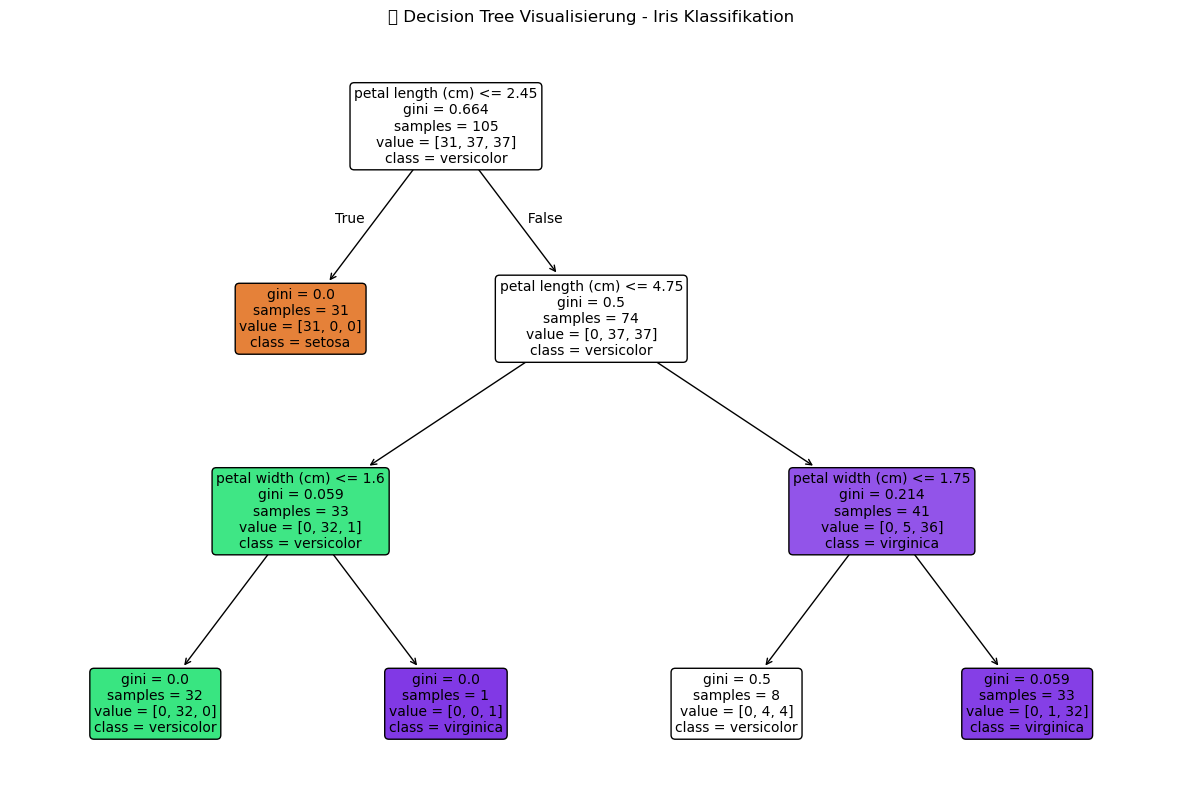


💡 Interpretation:
- Jeder Knoten zeigt eine Ja/Nein-Frage
- Blätter zeigen die finale Klassifikation
- Der Baum 'lernt' optimale Fragen automatisch!
- So treffen Computer 'menschenähnliche' Entscheidungen!


In [4]:
# 🌳 Decision Trees - "Willkommen in der Baumschule!" (Praktische Umsetzung)
print("🌳 Decision Trees - Wie Computer Entscheidungen treffen")
print("=" * 60)

# Iris-Datensatz laden (der Klassiker!)
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("📊 Datensatz-Info:")
print(f"- Features: {feature_names}")
print(f"- Targets: {target_names}")
print(f"- Samples: {X.shape[0]}")

# Datenaufteilung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree trainieren
dt_classifier = DecisionTreeClassifier(max_depth=3, min_samples_split=2, random_state=42)
dt_classifier.fit(X_train, y_train)

# Vorhersagen und Evaluation
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n✅ Accuracy: {accuracy:.2%}")
print(f"📋 Testsamples: {len(y_test)}")
print(f"🎯 Richtige Vorhersagen: {sum(y_test == y_pred)}")

# Visualisierung des Entscheidungsbaums
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, feature_names=feature_names, class_names=target_names, 
          filled=True, rounded=True, fontsize=10)
plt.title("🌳 Decision Tree Visualisierung - Iris Klassifikation")
plt.show()

print("\n💡 Interpretation:")
print("- Jeder Knoten zeigt eine Ja/Nein-Frage")
print("- Blätter zeigen die finale Klassifikation")
print("- Der Baum 'lernt' optimale Fragen automatisch!")
print("- So treffen Computer 'menschenähnliche' Entscheidungen!")

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


👥 K-Nearest Neighbors - Lernen von den Nachbarn
🔍 Testing verschiedene k-Werte:
k= 3: Accuracy = 100.00%
k= 5: Accuracy = 100.00%
k= 7: Accuracy = 100.00%

🏆 Bestes k: 3 mit 100.00% Accuracy


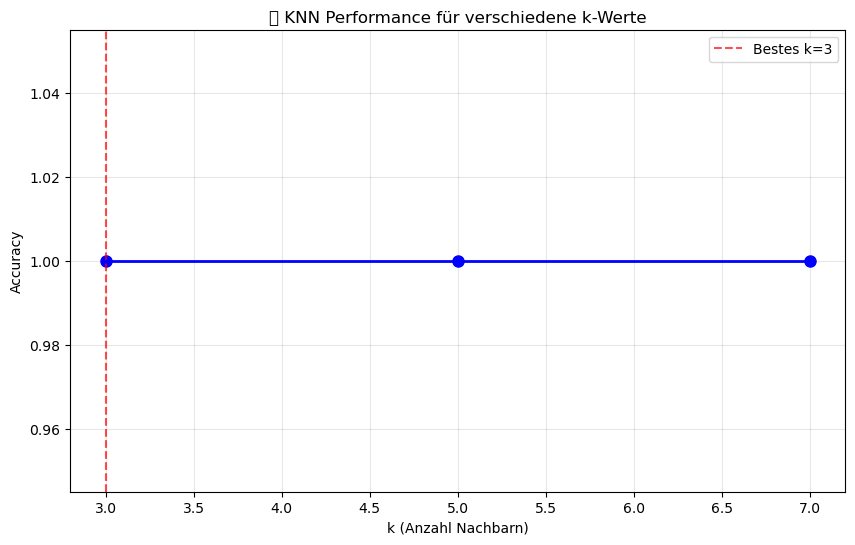


💡 KNN Learnings:
- k=1: Sehr flexibel, aber anfällig für Noise
- k=groß: Glatter, aber weniger Details
- Skalierung ist WICHTIG bei KNN!
- 'Lazy Learning': Kein Training, nur Speichern der Daten
- Funktioniert wie menschliche Intuition: 'Ähnliche Dinge sind ähnlich'


In [5]:
# 👥 K-Nearest Neighbors - "Schöne Nachbarschaft" (Praktische Umsetzung)
print("👥 K-Nearest Neighbors - Lernen von den Nachbarn")
print("=" * 60)

# Daten skalieren (wichtig für KNN!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verschiedene k-Werte testen
k_values = [3, 5, 7]
accuracies = []

print("🔍 Testing verschiedene k-Werte:")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_knn)
    accuracies.append(acc)
    print(f"k={k:2d}: Accuracy = {acc:.2%}")

# Bestes k finden
best_k = k_values[np.argmax(accuracies)]
print(f"\n🏆 Bestes k: {best_k} mit {max(accuracies):.2%} Accuracy")

# Visualisierung der k-Werte Performance
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'bo-', linewidth=2, markersize=8)
plt.title('👥 KNN Performance für verschiedene k-Werte')
plt.xlabel('k (Anzahl Nachbarn)')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)
plt.axvline(best_k, color='red', linestyle='--', alpha=0.7, label=f'Bestes k={best_k}')
plt.legend()
plt.show()

print("\n💡 KNN Learnings:")
print("- k=1: Sehr flexibel, aber anfällig für Noise")
print("- k=groß: Glatter, aber weniger Details")
print("- Skalierung ist WICHTIG bei KNN!")
print("- 'Lazy Learning': Kein Training, nur Speichern der Daten")
print("- Funktioniert wie menschliche Intuition: 'Ähnliche Dinge sind ähnlich'")

🎯 K-Means Clustering - Unsupervised Learning in Aktion
📊 Clustering-Datensatz:
- Samples: 300
- Features: 2 (für 2D-Visualisierung)
- Wahre Cluster: 4 (aber wir tun so, als wüssten wir das nicht!)

🔍 Elbow-Method: Suche optimales k...


/var/folders/qz/yzbl_3nj31sfz8p5s1wydw4c0000gn/T/ipykernel_87367/1099073572.py:58: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


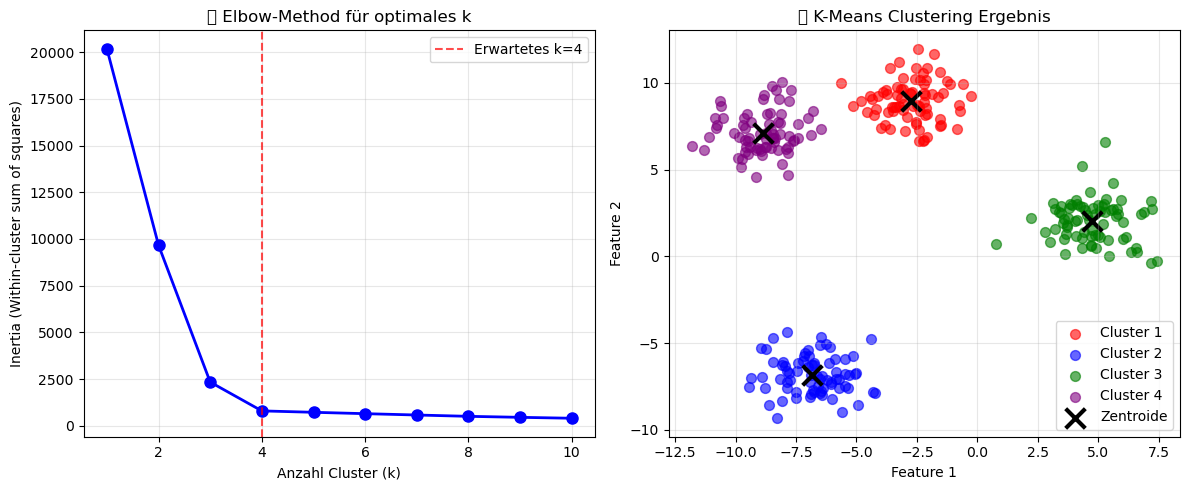


📊 Clustering-Qualität:
✅ Silhouette Score: 0.752 (höher = besser, max=1)
✅ Adjusted Rand Index: 0.991 (1.0 = perfekte Übereinstimmung)

💡 K-Means Learnings:
- Unsupervised: Keine Labels/Targets benötigt!
- Elbow-Method hilft bei k-Wahl
- Zentroide = Mittelpunkt jedes Clusters
- Anwendung: Customer Segmentation, Datenexploration
- Findet 'versteckte' Muster in den Daten!


In [6]:
# 🎯 K-Means Clustering - Unsupervised Learning in Aktion
print("🎯 K-Means Clustering - Unsupervised Learning in Aktion")
print("=" * 60)

# Clustering-Daten erstellen (wir simulieren "unbekannte" Gruppen)
X_cluster, y_true = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42, cluster_std=1.2)

print("📊 Clustering-Datensatz:")
print(f"- Samples: {X_cluster.shape[0]}")
print(f"- Features: {X_cluster.shape[1]} (für 2D-Visualisierung)")
print(f"- Wahre Cluster: 4 (aber wir tun so, als wüssten wir das nicht!)")

# Elbow-Method: Finde optimales k
print("\n🔍 Elbow-Method: Suche optimales k...")
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)

# Visualisierung
plt.figure(figsize=(12, 5))

# Elbow-Plot
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.title('🎯 Elbow-Method für optimales k')
plt.xlabel('Anzahl Cluster (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.grid(True, alpha=0.3)
plt.axvline(4, color='red', linestyle='--', alpha=0.7, label='Erwartetes k=4')
plt.legend()

# K-Means mit k=4
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_cluster)
centers = kmeans_final.cluster_centers_

# Cluster-Visualisierung
plt.subplot(1, 2, 2)
colors = ['red', 'blue', 'green', 'purple']
for i in range(optimal_k):
    cluster_points = X_cluster[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                c=colors[i], alpha=0.6, s=50, label=f'Cluster {i+1}')

plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', 
            s=200, linewidths=3, label='Zentroide')
plt.title('🎯 K-Means Clustering Ergebnis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Qualitätsbewertung
silhouette_avg = silhouette_score(X_cluster, cluster_labels)
ari_score = adjusted_rand_score(y_true, cluster_labels)

print(f"\n📊 Clustering-Qualität:")
print(f"✅ Silhouette Score: {silhouette_avg:.3f} (höher = besser, max=1)")
print(f"✅ Adjusted Rand Index: {ari_score:.3f} (1.0 = perfekte Übereinstimmung)")

print("\n💡 K-Means Learnings:")
print("- Unsupervised: Keine Labels/Targets benötigt!")
print("- Elbow-Method hilft bei k-Wahl")
print("- Zentroide = Mittelpunkt jedes Clusters")
print("- Anwendung: Customer Segmentation, Datenexploration")
print("- Findet 'versteckte' Muster in den Daten!")

## 🎓 Zusammenfassung: Die "Big 3" des Machine Learning

Du hast jetzt die drei wichtigsten Algorithmen des Machine Learning kennengelernt - sowohl theoretisch als auch praktisch!

### 🌳 Decision Trees
- **Stärken**: Interpretierbar, keine Skalierung nötig, arbeitet mit allen Datentypen
- **Schwächen**: Overfitting, instabil bei kleinen Datenänderungen
- **Einsatz**: Wenn Interpretierbarkeit wichtig ist (Medizin, Finanzen)
- **AMALEA-Weisheit**: "Wie Menschen denken - durch Ja/Nein-Fragen"

### 👥 K-Nearest Neighbors
- **Stärken**: Einfach zu verstehen, keine Annahmen über Datenverteilung
- **Schwächen**: Braucht Skalierung, langsam bei großen Daten
- **Einsatz**: Baseline-Algorithmus, lokale Muster, Empfehlungssysteme
- **AMALEA-Weisheit**: "Sage mir, wer deine Nachbarn sind..."

### 🎯 K-Means Clustering
- **Stärken**: Unsupervised, findet versteckte Muster, skalierbar
- **Schwächen**: k muss vorgegeben werden, nur runde Cluster
- **Einsatz**: Datenexploration, Customer Segmentation, Feature Engineering
- **AMALEA-Weisheit**: "Daten sprechen lassen - ohne Labels!"

---

## 🚀 Nächste Schritte & Vertiefung

### 📚 Empfohlene Reihenfolge:
1. **🎬 Videos schauen**: Die Original AMALEA-Videos ergänzen perfekt diese praktische Erfahrung
2. **🔬 Eigene Daten testen**: Lade deine eigenen Datasets und experimentiere
3. **📊 Streamlit-Apps erstellen**: Baue interaktive Apps für alle drei Algorithmen
4. **🧠 Neural Networks**: Weiter zu Woche 4 - Deep Learning!

### 💡 Pro-Tipps aus den AMALEA-Videos:
- **Immer mehrere Algorithmen testen** - jeder hat seine Stärken
- **Cross-Validation verwenden** für robuste Evaluation
- **Feature Engineering** kann wichtiger sein als der Algorithmus
- **Domain Knowledge** schlägt oft komplexe Algorithmen
- **Start simple, then complexify** - beginne mit einfachen Modellen

### 🔬 Experimentier-Ideen:
- Teste verschiedene `max_depth` Werte bei Decision Trees
- Probiere verschiedene Distance Metrics bei KNN
- Verwende PCA vor K-Means für hochdimensionale Daten
- Kombiniere alle drei: Clustering → Feature Engineering → Classification

---

> 🎓 **Original AMALEA-Weisheit**: "Verstehst du Decision Trees, KNN und K-Means, verstehst du 80% aller ML-Projekte!"

**Herzlichen Glückwunsch! Du bist jetzt bereit für Advanced Machine Learning! 🚀**

---

### 📈 Was kommt als nächstes?
- **Woche 4**: Neural Networks & Deep Learning
- **Woche 5**: Computer Vision & CNNs  
- **Woche 6**: Natural Language Processing & Transformers

### 💡 Hinweise für eure Runs
- Vorher `pip install -r requirements.txt` (Repo-Root oder Wochen-spezifisch) ausführen.
- Seeds gesetzt (oben) für Repro; bei Bedarf weitere Zufallsquellen seeden.
- Kleine Grids für Demos; große Grids nur auf Server/Cloud.
- Versionen werden oben geloggt, damit Ergebnisse nachvollziehbar sind.
